dataset: https://www.kaggle.com/shivamb/netflix-shows

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv(r'D:\Projects\New folder\netflix_titles.csv')
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


# Basic Visualization using Matplotlib

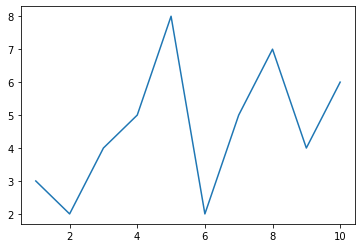

In [7]:
fig, ax = plt.subplots()  
# Creating some  dummy data
ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 2, 4, 5, 8, 2, 5, 7, 4, 6])

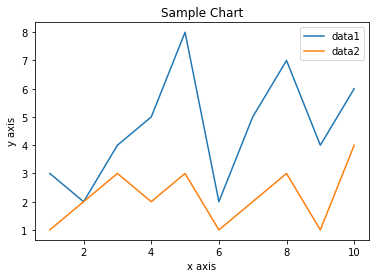

In [11]:
#  Declare a chart with one Axis
fig, ax = plt.subplots()  
# Creating some  dummy data
ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 2, 4, 5, 8, 2, 5, 7, 4, 6], label = 'data1')
ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 2, 3, 1, 2, 3, 1, 4], label = 'data2') 
ax.set_xlabel('x axis') 
ax.set_ylabel('y axis')
ax.set_title("Sample Chart")
ax.legend()

In [12]:
n_data = data.groupby(['release_year', 'type'], as_index=False).show_id.count()
n_data.columns = ['release_year', 'type', 'count']
n_data_pivot = n_data.pivot(index='release_year', columns='type', values='count').reset_index()
n_data_pivot.fillna(0, inplace = True)
n_data_pivot.head()

type,release_year,Movie,TV Show
0,1925,0.0,1.0
1,1942,2.0,0.0
2,1943,3.0,0.0
3,1944,3.0,0.0
4,1945,3.0,0.0


In [13]:
n_data.head()

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


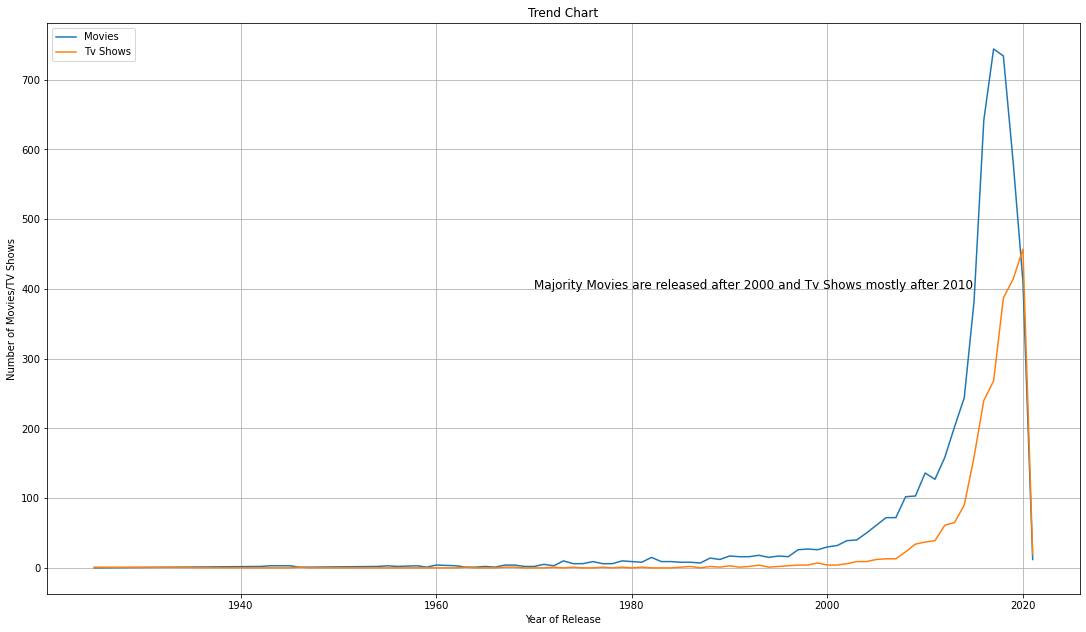

In [18]:
#  Declare a chart with one Axis
fig, ax = plt.subplots()  
# Creating some  dummy data
ax.plot(n_data_pivot.release_year, n_data_pivot['Movie'], label = 'Movies')
ax.plot(n_data_pivot.release_year, n_data_pivot['TV Show'], label = 'Tv Shows') 
ax.set_ylabel('Number of Movies/TV Shows') 
ax.set_xlabel('Year of Release')
ax.set_title("Trend Chart")
plt.text(x=1970, y=400, s=r'Majority Movies are released after 2000 and Tv Shows mostly after 2010', fontsize = 12)
fig.set_size_inches(18.5, 10.5)
plt.grid()
ax.legend()

In [19]:
data['year_added'] = data['date_added'].str.slice(start=-4)
n_data_added = data.groupby(['year_added', 'type'], as_index=False).show_id.count()
n_data_added.columns = ['year_added', 'type', 'count']
n_data_added = n_data_added.pivot(index='year_added', columns='type', values='count').reset_index()
n_data_added.fillna(0, inplace = True)
n_data_added.head()

type,year_added,Movie,TV Show
0,2008,1.0,1.0
1,2009,2.0,0.0
2,2010,1.0,0.0
3,2011,13.0,0.0
4,2012,3.0,0.0


# Vertical Bar chart

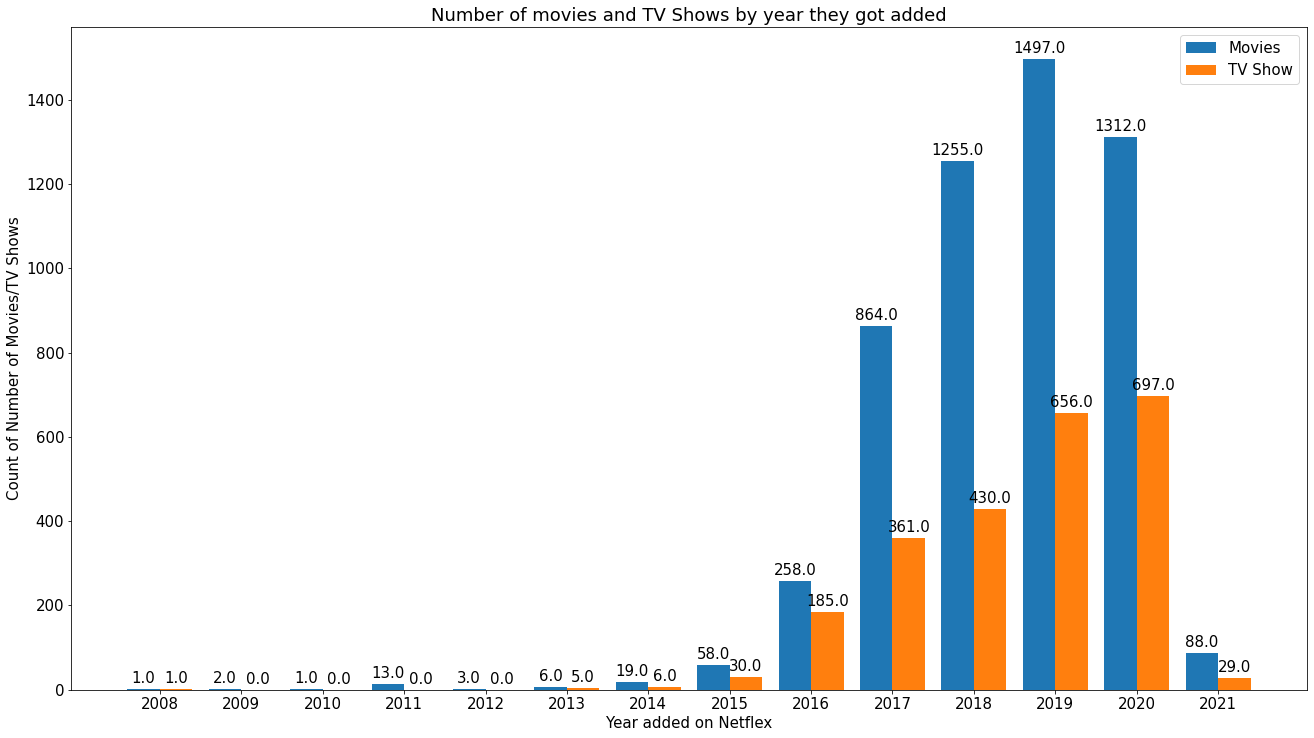

In [24]:
labels = n_data_added['year_added']

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
Movies_rects = ax.bar(x - width/2, n_data_added['Movie'], width, label='Movies') # Add color here
TVshows_rects = ax.bar(x + width/2, n_data_added['TV Show'], width, label='TV Show')

# Add some text for labels, title, configure chart size
ax.set_xlabel('Year added on Netflex')
ax.set_ylabel('Count of Number of Movies/TV Shows')
ax.set_title('Number of movies and TV Shows by year they got added')
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.set_size_inches(18.5, 10.5)
plt.rcParams.update({'font.size': 15})
ax.legend()

 #Function to generate labels on top of the bars
def gen_label(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


gen_label(Movies_rects)
gen_label(TVshows_rects)

fig.tight_layout()
plt.show()

# Horizontal Bar Chart

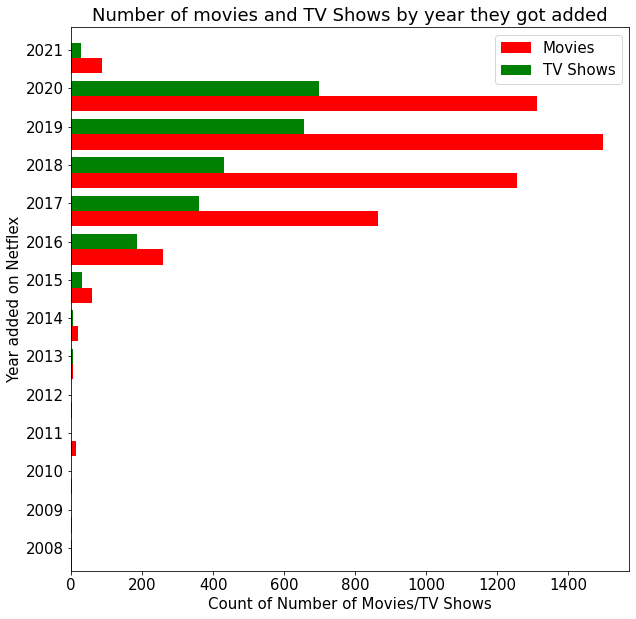

In [25]:
data = pd.DataFrame(dict(Year = n_data_added['year_added'],
                       Movie = n_data_added['Movie'], TVshow=n_data_added['TV Show'])) 

ind = np.arange(len(data))
width = 0.4

fig1, ax1 = plt.subplots()
ax1.barh(ind, data.Movie, width, color='red', label='Movies')
ax1.barh(ind + width, data.TVshow, width, color='green', label='TV Shows')

ax1.set(yticks=ind + width, yticklabels=data.Year, ylim=[2*width - 1, len(data)])

ax1.set_ylabel('Year added on Netflex')
ax1.set_xlabel('Count of Number of Movies/TV Shows')
ax1.set_title('Number of movies and TV Shows by year they got added')

ax1.legend()
fig1.set_size_inches(10, 10)
plt.show()

# Stacked Bar Chart

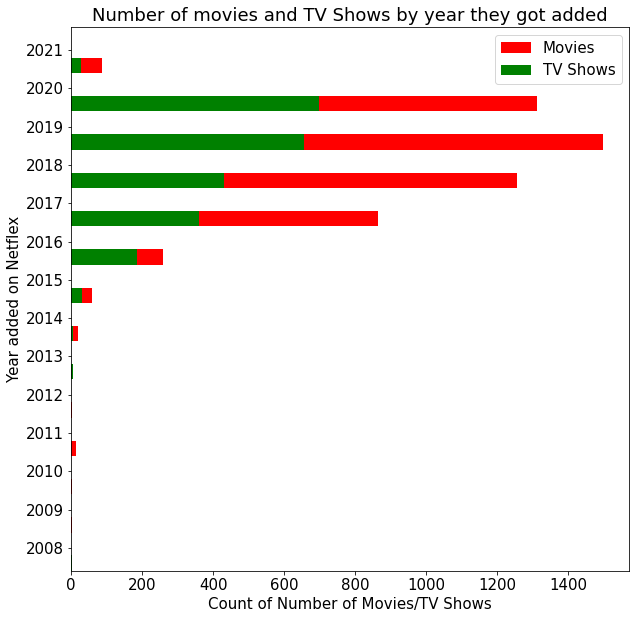

In [29]:
fig1, ax1 = plt.subplots()
ax1.barh(ind, data.Movie, width, color='red', label='Movies')
ax1.barh(ind, data.TVshow, width, color='green', label='TV Shows')

ax1.set(yticks=ind + width, yticklabels=data.Year, ylim=[2*width - 1, len(data)])

ax1.set_ylabel('Year added on Netflex')
ax1.set_xlabel('Count of Number of Movies/TV Shows')
ax1.set_title('Number of movies and TV Shows by year they got added')

ax1.legend()
fig1.set_size_inches(10, 10)
plt.show()

# Pie Chart

In [30]:
# Small modification to data to suit for the Pie Chart
n_data_added['Total'] = n_data_added['Movie'] + n_data_added['TV Show']
# To select last few rows only
n_data_added_flt = n_data_added[-4:]
n_data_added_flt = n_data_added_flt.reset_index(drop=True) # For resetting index
n_data_added_flt.head()

type,year_added,Movie,TV Show,Total
0,2018,1255.0,430.0,1685.0
1,2019,1497.0,656.0,2153.0
2,2020,1312.0,697.0,2009.0
3,2021,88.0,29.0,117.0


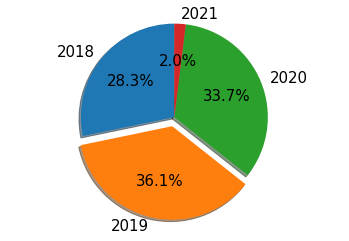

In [31]:
labels = n_data_added_flt['year_added']
sizes = n_data_added_flt['Total']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice 

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Donut Chart

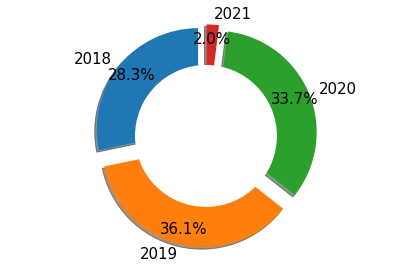

In [32]:
# Pie chart
labels = n_data_added_flt['year_added']
sizes = n_data_added_flt['Total']
explode = (0.1, 0.1, 0.1, 0.1)  # "explode" all the slices

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85) # Adjust font location

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.show()

# Seaborn

Dataset: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [9]:
import pandas as pd
import seaborn as sns
heart_failure_data = pd.read_csv(r'D:\Projects\New folder\heart_failure_clinical_records_dataset.csv')
heart_failure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
# transforming data for visualization
agg_data = heart_failure_data.groupby(['age', 'DEATH_EVENT'], as_index=False).ejection_fraction.count()
agg_data.columns = ['Age', 'Death_Event', 'Count']
agg_data.head()

,Age,Death_Event,Count
0,40.0,0,7
1,41.0,0,1
2,42.0,0,6
3,42.0,1,1
4,43.0,0,1


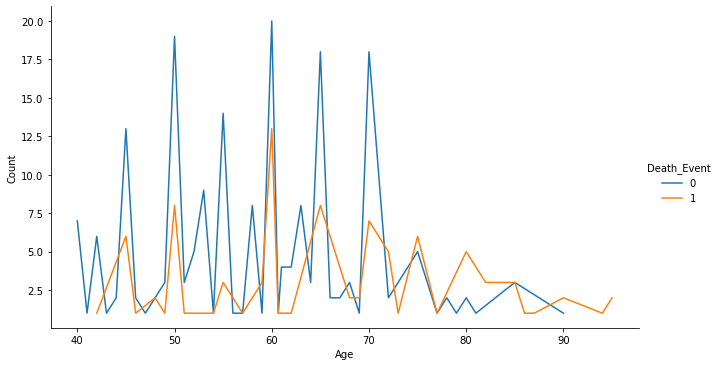

In [11]:
#relplot: scatterplot() (with kind="scatter"; the default) & ineplot() (with kind="line")

lineplot() (with kind="line")
sns.relplot(x="Age", y="Count", 
            hue="Death_Event" , aspect=16/9,
            kind="line", data=agg_data);

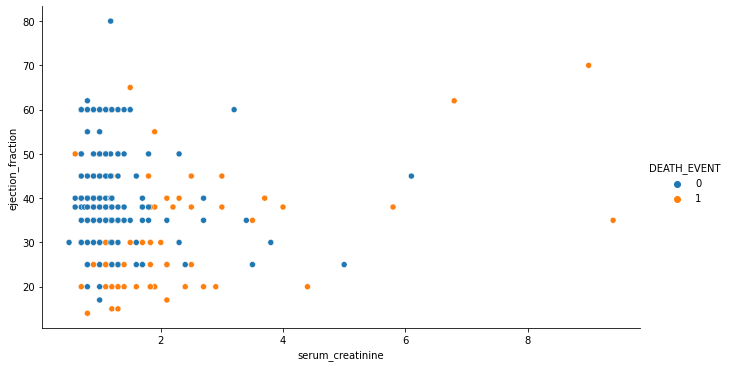

In [12]:
sns.relplot(x="serum_creatinine", y="ejection_fraction", 
            hue="DEATH_EVENT", kind="scatter", # Kind is optional
            data=heart_failure_data, aspect=16/9);

# Heatmap

In [13]:
# Data for heatmap
agg_data2 = heart_failure_data.groupby(['age', 'ejection_fraction'], as_index=False).DEATH_EVENT.sum()
agg_data2.columns = ['Age', 'ejection_fraction', 'Deaths']
agg_data2_p = agg_data2.pivot(index='Age', columns='ejection_fraction', values='Deaths')
agg_data2_p.fillna(0, inplace=True)
agg_data2_p.head(20)

ejection_fraction,14,15,17,20,25,30,35,38,40,45,50,55,60,62,65,70,80
Age,,,,,,,,,,,,,,,,,
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


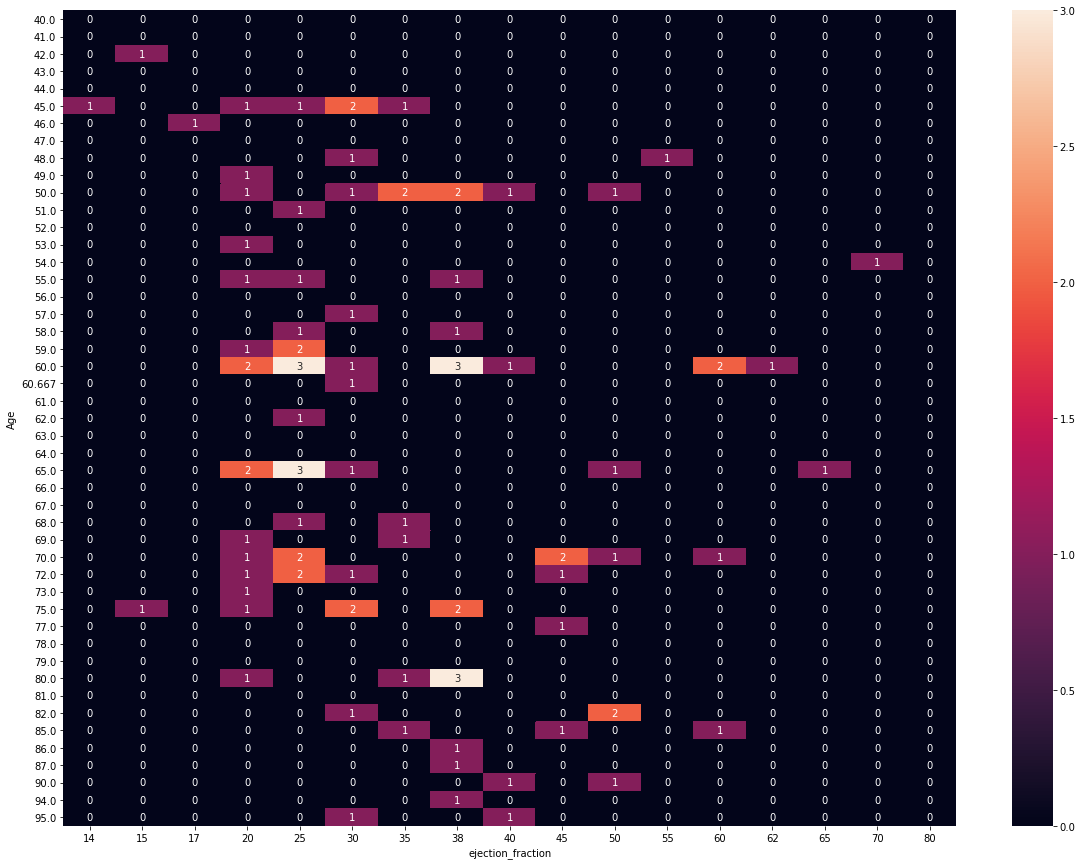

In [14]:
plt.subplots(figsize=(20,15))
sns.heatmap(agg_data2_p, annot=True)
plt.show()

# Pair Plot

In [15]:
subset = heart_failure_data.iloc[:,[0,1,2,3,4]]
subset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction
0,75.0,0,582,0,20
1,55.0,0,7861,0,38
2,65.0,0,146,0,20
3,50.0,1,111,0,20
4,65.0,1,160,1,20


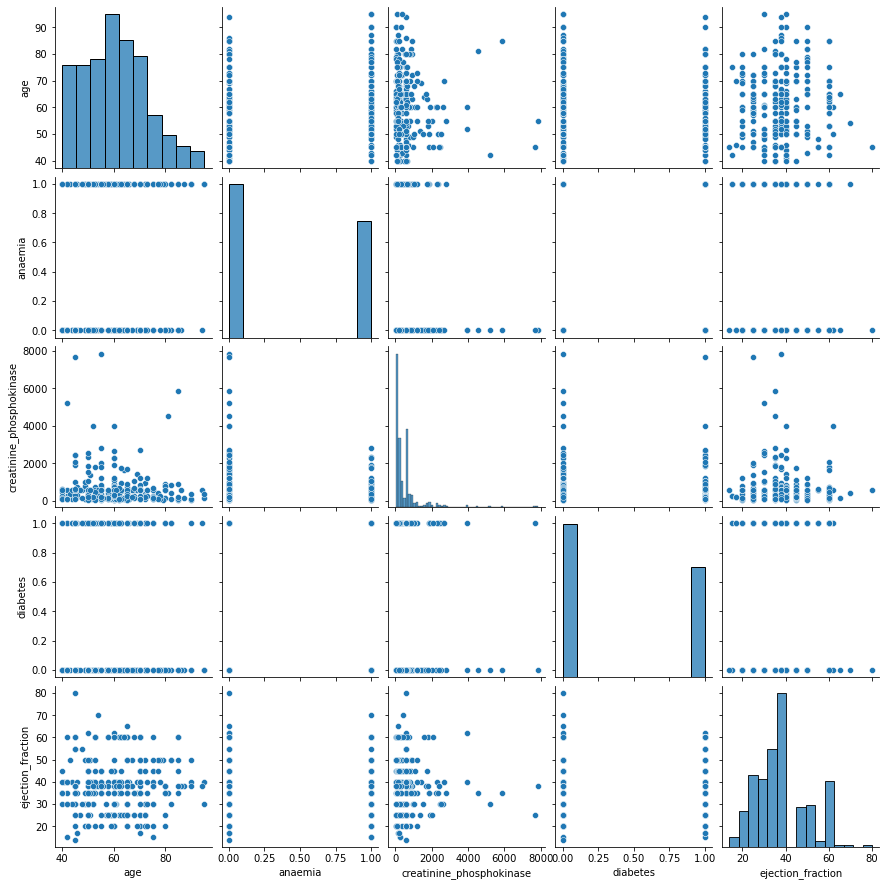

In [16]:
sns.pairplot(subset)

# Bokeh Plot

In [20]:

from bokeh.plotting import figure, output_file, show

p = figure(title = "Age Vs Ejection Fraction")
p.xaxis.axis_label = 'Age'
p.yaxis.axis_label = 'Ejection Fraction'

p.circle(agg_data2["Age"], agg_data2["ejection_fraction"],
         fill_alpha=0.2, size=10)

output_file("test.html", title="Example")

show(p)